# LSTM - Long Short Term Memory Networks

**What will you learn in this workshop?**

* Get stock data using pandas 

* Visualize the stock data using plotly and matplotlib libraries

* Predict the stock price using LSTM (The Long Short-Term Memory network application) in Keras

* hyperparameter results regarding "epochs"

* Split train-valid-test datasets for timeseries. 

**LSTM**

* LSTM is a special type of recurrent neural network (RNN) architecture that remembers values at random intervals and can learn long-term dependencies.

* Very large architectures can be successfully trained by LSTM

* It is commonly used for regression and time series classification and forecasting in machine learning. It can memorize data for long periods, which differentiates LSTM neural networks from other neural networks.

* Instead of neurons, LSTM networks have memory blocks connected through layers.

* Each Block has gates (output, state), each gate uses sigmoid activation units

* Each block works only one input sequence

* There are three types of gates within a unit:

    - **Forget Gate**: conditionally decides what information to throw away from the block
    - **Input Gate**: conditionally decides which values from the input to update the memory state
    - **Output Gate**: conditionally decides what to output based on input and the memory of the block
    

* LSTM Applications examp:Text Generation, Handwriting Recognition, Handwriting Production, Music Production..etc

* To better understand and focus on LSTM I used last 5 years stock market data of Tesla, Ali Baba, Pepsi Cola, Netflix companies.

**AIM**: Predict the Stock "Close" Price

* Companies for stock analysis: **TSLA**:Tesla (technology), **BABA**:Ali Baba (shopping), **PEP**: Pepsi Cola(food), **NFLX**: Netflix (Entertainment) 

* Independent variables:
    - Date
    - Open
    - Adj Close
    - Volume
    - High
    - Low
    - Company
*  Dependent - Target variable
    - Close


### Install yfinance library 

In [1]:
 !pip install yfinance

### Import libraries

In [2]:
# import main libraries
import pandas as pd
import numpy as np

# import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")


#difference between go and px, go is more detailed but more coding need, px less detailed but quick
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# import finance and time libraries
import yfinance as yf
from datetime import date, timedelta

# Keras and sklearn libraries
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# assigning today's date
today = date.today()

------------------------------

### Companies

In [3]:
# companies to analyse

company_list = ['NFLX','PEP','BABA','TSLA']

----------------

### Date conversion 

In [4]:
# convert today's date to string (strftime)

last_date = today.strftime("%Y-%m-%d")
last_date

'2022-08-12'

In [5]:
# get the date of 1825 days ago (5 years)

decade = today - timedelta(days = 1825)
first_date = decade.strftime("%Y-%m-%d")
first_date

'2017-08-13'

--------------------------

### Reach Data and Create Dataframe

In [6]:
# all companies in the list are saved as dataframe separetly bearing the their stock data (Open,High,Low,Close,Adj Close,Volume)
# use globals() convert string to variable
# get the data of a company with yf.download

for company in company_list:
    globals()[company] = yf.download(company,
                            start=first_date, 
                            end=last_date, 
                            progress=False)

In [7]:
# first 3 rows
for company in company_list:
    display(globals()[company].head(3))

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-08-14,169.800003,172.449997,168.800003,171.000000,171.000000,7468400
2017-08-15,171.529999,171.880005,168.250000,168.500000,168.500000,5656100
2017-08-16,167.500000,170.500000,166.250000,169.979996,169.979996,7013600


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-08-14,117.360001,118.180000,117.010002,117.839996,101.750916,3191700
2017-08-15,117.879997,119.150002,117.849998,118.970001,102.726639,2749800
2017-08-16,118.959999,119.360001,118.820000,119.099998,102.838882,2373900


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-08-14,154.770004,155.080002,153.100006,154.610001,154.610001,14601800
2017-08-15,155.740005,158.320007,154.000000,157.750000,157.750000,18635700
2017-08-16,160.000000,160.350006,158.535004,159.500000,159.500000,21318300


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-08-14,72.926003,73.531998,72.519997,72.760002,72.760002,22596000
2017-08-15,73.040001,73.098000,71.874001,72.466003,72.466003,15425500
2017-08-16,72.599998,73.300003,72.503998,72.582001,72.582001,17069000


--------------------------------------

### Assigning Comapany name as variable

In [8]:
# Add "Company" variable to all dataframes 

for company in company_list:
    globals()[company]["Company"] = company

In [9]:
# first 3 rows
for company in company_list:
    display(globals()[company].head(3))
    

,Open,High,Low,Close,Adj Close,Volume,Company
Date,,,,,,,
2017-08-14,169.800003,172.449997,168.800003,171.000000,171.000000,7468400,NFLX
2017-08-15,171.529999,171.880005,168.250000,168.500000,168.500000,5656100,NFLX
2017-08-16,167.500000,170.500000,166.250000,169.979996,169.979996,7013600,NFLX


,Open,High,Low,Close,Adj Close,Volume,Company
Date,,,,,,,
2017-08-14,117.360001,118.180000,117.010002,117.839996,101.750916,3191700,PEP
2017-08-15,117.879997,119.150002,117.849998,118.970001,102.726639,2749800,PEP
2017-08-16,118.959999,119.360001,118.820000,119.099998,102.838882,2373900,PEP


,Open,High,Low,Close,Adj Close,Volume,Company
Date,,,,,,,
2017-08-14,154.770004,155.080002,153.100006,154.610001,154.610001,14601800,BABA
2017-08-15,155.740005,158.320007,154.000000,157.750000,157.750000,18635700,BABA
2017-08-16,160.000000,160.350006,158.535004,159.500000,159.500000,21318300,BABA


,Open,High,Low,Close,Adj Close,Volume,Company
Date,,,,,,,
2017-08-14,72.926003,73.531998,72.519997,72.760002,72.760002,22596000,TSLA
2017-08-15,73.040001,73.098000,71.874001,72.466003,72.466003,15425500,TSLA
2017-08-16,72.599998,73.300003,72.503998,72.582001,72.582001,17069000,TSLA


--------------------------------------

### Concat Dataframes

In [10]:
# append the dataframes into one list
df_list =[]
    
for company in company_list:
                                         
    df_list.append(globals()[company])   

In [11]:
# concat the companies in one dataframe
df = pd.concat(df_list,axis=0)
df

,Open,High,Low,Close,Adj Close,Volume,Company
Date,,,,,,,
2017-08-14,169.800003,172.449997,168.800003,171.000000,171.000000,7468400,NFLX
2017-08-15,171.529999,171.880005,168.250000,168.500000,168.500000,5656100,NFLX
2017-08-16,167.500000,170.500000,166.250000,169.979996,169.979996,7013600,NFLX
2017-08-17,169.229996,170.580002,165.720001,166.089996,166.089996,5229200,NFLX
2017-08-18,165.949997,169.970001,165.800003,166.539993,166.539993,7385700,NFLX
...,...,...,...,...,...,...,...
2022-08-05,908.010010,913.820007,856.630005,864.510010,864.510010,37655300,TSLA
2022-08-08,885.000000,915.599976,867.260010,871.270020,871.270020,32998000,TSLA
2022-08-09,870.880005,877.190002,838.059998,850.000000,850.000000,28748200,TSLA


----------------------

## Data Visualization 


In [12]:
for company in company_list:
    
    figure_config = dict({"data":[{"type":"bar", "x" : globals()[company].index, "y": globals()[company]["Close"]}],\
                         "layout": {"title":{"text": company+" Stock Price", "x":0.5, "font":{'color': 'red','size': 15}}}},)

    fig = go.Figure(figure_config)
    fig.update_xaxes(title_text="Date")
    fig.update_yaxes(title_text="Stock Close Price $")
    fig.show()

--------------

### Comparing the volumes of the companies

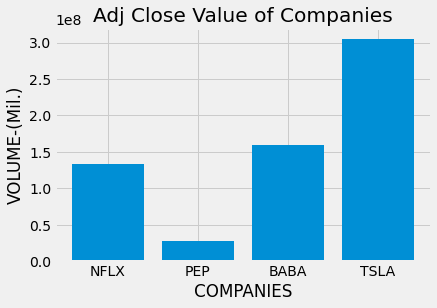

In [13]:
# Matplotlib

plt.bar(df["Company"], df["Volume"])
plt.xlabel("COMPANIES")
plt.ylabel("VOLUME-(Mil.)")
plt.title("Adj Close Value of Companies")
plt.show();

--------------

### Stock Adj Close Price

In [14]:
# plotly is used 
fig = px.line(df, x = df.index, y ="Adj Close", color = "Company")
fig.show()

-----------------

### Volume of the Each Company up to Date

In [15]:
fig = make_subplots(rows = 4, cols = 1,subplot_titles=(company_list))

row_num = 1

for company in company_list:
    
    df_choose = df[df["Company"] == company]
    
    
    fig.add_trace(go.Scatter(x = df_choose.index, y = df_choose.Volume, mode ="lines",name=company), row=row_num, col=1)
    
    fig.update_layout(autosize=False, width=1000, height=1500)
    
    fig.update_xaxes(title_text="Date", row=row_num, col=1)
    fig.update_yaxes(title_text="Volume", row=row_num, col=1)
    
    row_num += 1
      

fig.show()

----------------------

### Volume of the Each Company as Scatter plot

In [16]:
fig = make_subplots(rows = 4, cols = 1,subplot_titles=(company_list))

row_num = 1

for company in company_list:
    
    df_choose = df[df["Company"] == company]
    
    fig.add_trace(go.Scatter(x = df_choose.Volume, y = df_choose.index, mode ="markers",name=company), row=row_num, col=1)
    
    fig.update_layout(autosize=False, width=1000, height=1500)
    
    fig.update_xaxes(title_text="Volume", row=4, col=1)
    
    fig.update_yaxes(title_text="Volume", row=4, col=1)
    
    row_num += 1

fig.show()

---------------------------

### All Variables are together. just click a variable under "variable legend" to apply filter 

In [17]:
fig = px.area(df, facet_col="Company", facet_col_wrap=2)
fig.show()

--------------------

## Candlestick Chart of TESLA

In [18]:
fig1 = px.bar(x = TSLA.index, y = TSLA.Volume)

date_buttons = [
{'count': 28, 'label': "4WTD", 'step': "day", 'stepmode': "todate"},
{'count': 6, 'label': "6MTD", 'step': "month", 'stepmode': "todate"},
{'count': 1, 'label': "YTD", 'step': "year", 'stepmode': "todate"}]


candle = go.Candlestick(x =  TSLA.index, 
                            open = TSLA["Open"], 
                            high=TSLA["High"],
                            low=TSLA["Low"], 
                            close=TSLA["Close"])

fig = go.Figure(candle)

fig.update_layout(autosize=False, width=1200, height=800)
    
fig.update_layout(title = company +" Stock Price Analysis",xaxis_rangeslider_visible=True)

fig.update_yaxes(title_text="Price")

fig.update_xaxes(title_text="Date")
    
fig.update_layout( {"xaxis":
                            {"rangeselector":
                                 {"buttons": date_buttons} } } )


fig.show()

-------------------

## Simple Moving Avarage  - 14, 21, 30, 50 days

In [19]:
# TSLA data for only 2022 date

TSLA_2022 = TSLA.loc["2022"] 

In [20]:
# rolling shows how many steps will forward
# shift is used for getting previous moving avarage
# if you use rolling without shift, the data includes its own also, we dont want to this. So shift should be used!

TSLA_2022_SMA = pd.DataFrame({"Close": TSLA_2022["Close"],
              "SMA_14": TSLA_2022["Close"].shift(1).rolling(window=14).mean(),
              "SMA_21": TSLA_2022["Close"].shift(1).rolling(window=21).mean(),
              "SMA_30": TSLA_2022["Close"].shift(1).rolling(window=30).mean(),
              "SMA_50": TSLA_2022["Close"].shift(1).rolling(window=50).mean()})

In [21]:
#check data

TSLA_2022_SMA

,Close,SMA_14,SMA_21,SMA_30,SMA_50
Date,,,,,
2022-01-03,1199.780029,NaN,NaN,NaN,NaN
2022-01-04,1149.589966,NaN,NaN,NaN,NaN
2022-01-05,1088.119995,NaN,NaN,NaN,NaN
2022-01-06,1064.699951,NaN,NaN,NaN,NaN
2022-01-07,1026.959961,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2022-08-05,864.510010,829.625009,792.817627,765.311005,739.631401
2022-08-08,871.270020,839.830008,799.050008,770.621004,744.358402
2022-08-09,850.000000,849.450008,804.715724,775.092672,748.607803


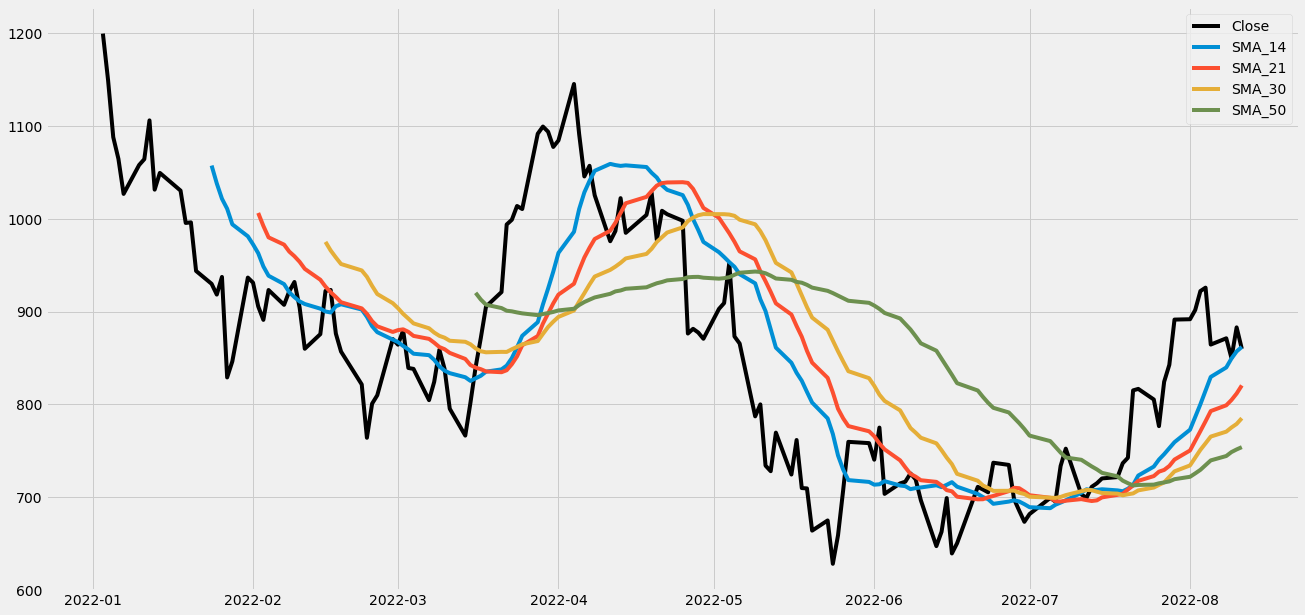

In [22]:
plt.figure(figsize=(20,10))
plt.plot(TSLA_2022_SMA["Close"], label = "Close",color = "black")
plt.plot(TSLA_2022_SMA["SMA_14"], label = "SMA_14")
plt.plot(TSLA_2022_SMA["SMA_21"], label = "SMA_21")
plt.plot(TSLA_2022_SMA["SMA_30"], label = "SMA_30")
plt.plot(TSLA_2022_SMA["SMA_50"], label = "SMA_50")

plt.legend()
plt.show();

--------------------------------------------

### Correlation of the Companies according to percentage changing

* the scatter data mainly accumulates on 0.0 axis in the kdegraphs. percentage changing in stock prices are not well corraleted.
* pct_change(): Computes the percentage change from the immediately previous row by default. This is useful in comparing the percentage of change in a time series of elements.
* The first row contains NaN values, as there is no previous row from which we can calculate the change.
* For example, if the values are [2,3,6], the returned values would be [NaN, 0.5, 1.0]. This is because there is a 50% increase from the first element to the second and a 100% increase from the second element to the third

In [23]:
cor_df = pd.pivot_table(df, index = df.index, columns = "Company", values = "Close")
per_df = cor_df.pct_change()
per_df.head() 

Company,BABA,NFLX,PEP,TSLA
Date,,,,
2017-08-14,NaN,NaN,NaN,NaN
2017-08-15,0.020309,-0.014620,0.009589,-0.004041
2017-08-16,0.011094,0.008783,0.001093,0.001601
2017-08-17,0.027712,-0.022885,-0.005961,-0.030283
2017-08-18,0.021840,0.002709,-0.006673,-0.012673


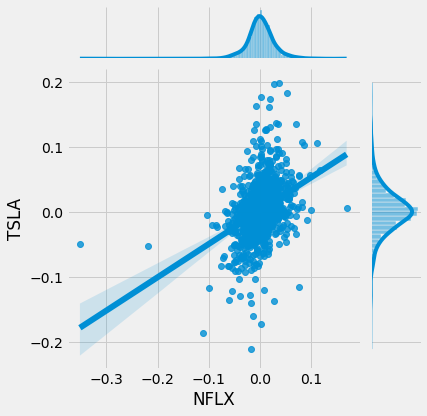

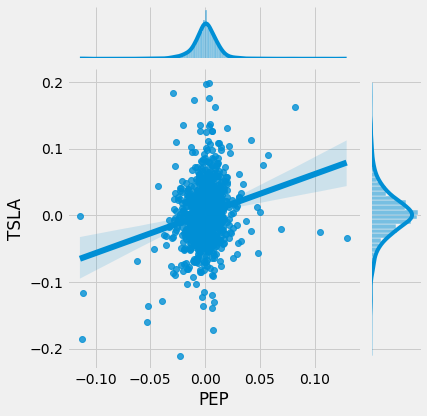

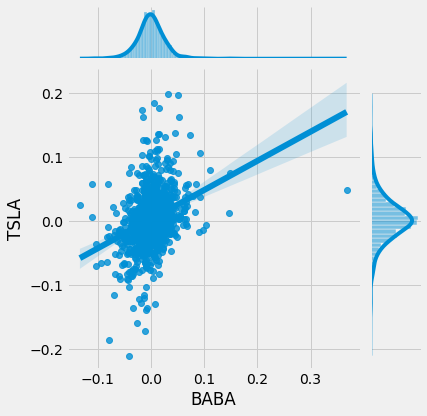

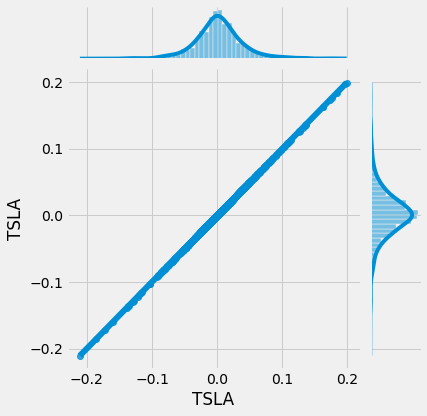

In [24]:
for i in company_list:
    
    sns.jointplot(x=i, y="TSLA", kind ="reg", data=per_df );

--------------------------

### Heatmap of the Companies regarding Close Price

* The results show that although there is no negative correlation between companies and thus Industries with respect to "Close" price, there is not a big positive correlation either.

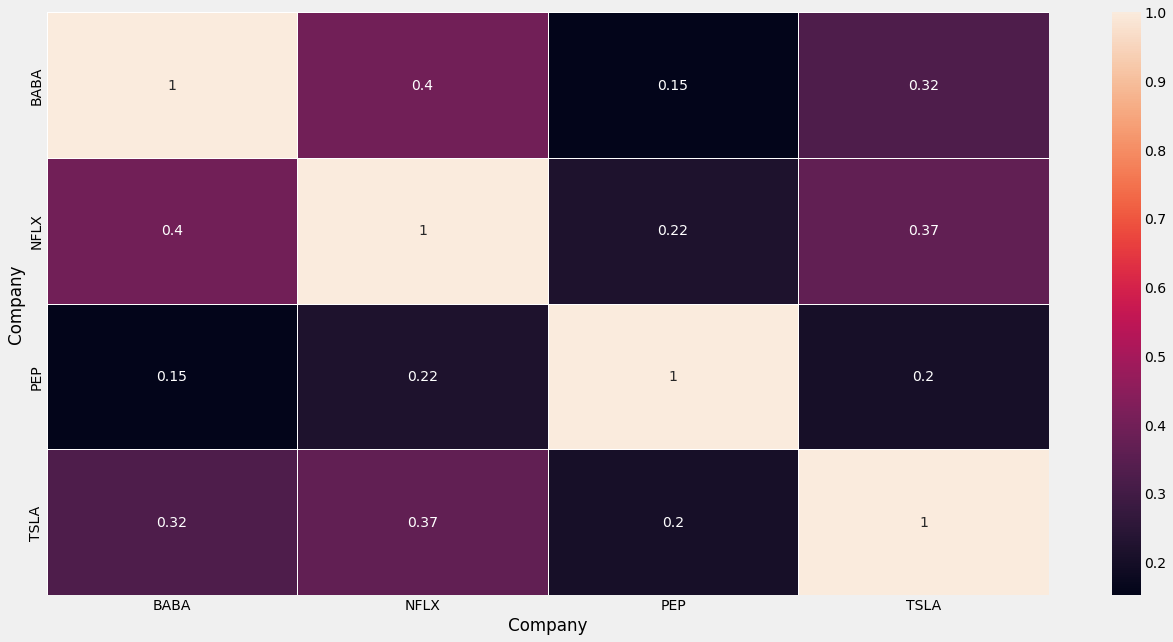

In [25]:
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(per_df.corr(), annot=True, linewidths=.5, ax=ax)
plt.show();

-----------------------------------
----------------------------------

# NETFLIX Stock Price Prediction
* I handle two different types test-valid split combination for different problems
 
  - A - predict to next day - split tha train and valid data regarding previos days number which is described by user. target and feature variable  only "Close" 
  - B - predict to 3 mounths - split data as the train data, valid data, and test data according to the desired month range.  target variable "Close",   Features are "Volume", "Open", "High", "Low", "Adj Close"

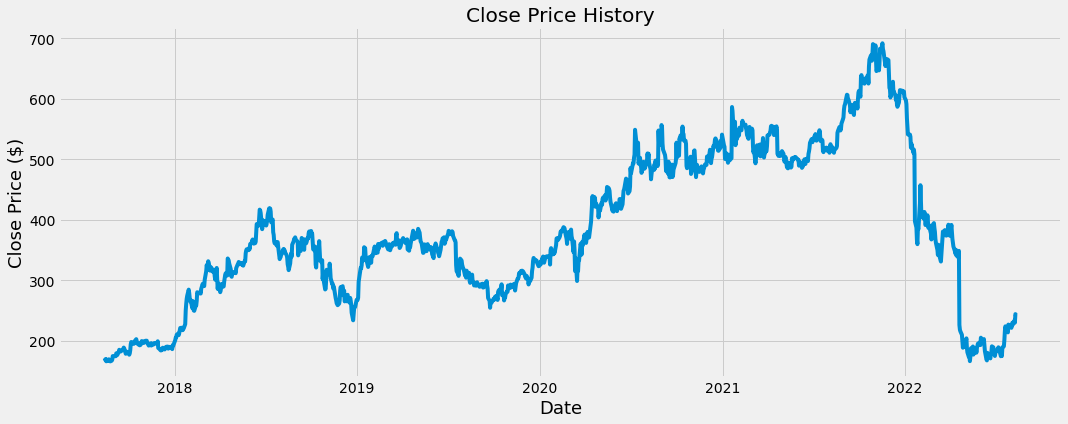

In [26]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(NFLX.index,NFLX['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ($)', fontsize=18)
plt.show()

----------------------

# A - predict to next day
* Target and feature variable: "Close"
* Standart scaler to "Close" variable
* Split into Train, Valid and Test
* Split to X, y array with function
* Standart scaler
* reshape the feautures 2ndim to 3 ndim 
* LSTM
* prediction train and valid
* calculation RMSE
* prediction Test
* Visulaization

In [27]:
# record only "Close" variable as array

data = NFLX["Close"]

In [28]:
# scaler

Scale=StandardScaler()
data_scale = Scale.fit_transform(data.values.reshape(-1, 1))

In [29]:
# Describe the data sizes

total_size =  data_scale.shape[0]
print("total data size: ",total_size)

train_size = round(len(data_scale) * 0.7)
print("train data size: ",train_size)
train_array = data_scale[0:train_size]

valid_size = round(len(data_scale) * 0.2)
print("valid data size: ",valid_size)
valid_size = train_size + valid_size
valid_array = data_scale[train_size:valid_size]
    
test_size = total_size - valid_size
print("test data size:  ", test_size)
test_array = data_scale[valid_size:total_size]

total data size:  1258
train data size:  881
valid data size:  252
test data size:   125


In [30]:
# function for splitting target data into X and y  

def lstm_dataset(dataset, back_day=15):
    """
    info:
        This func splits the main dataset into "valid" and "train" data to use in 
        stock close price prediction model.
        
    parameters:
        dataset: Scaled dataset to split as test and train.(np.array)
        back_day: the number of days from the past to predict the future. (integer)
        
    retrun:
        np.array(X): dependent 
        np.array(y): independent
    """

    X,y = [],[]
    
    first = back_day
    predict_day = 1
    last  = len(dataset) - predict_day
    
    for i in range(first, last):
        
        X.append(dataset[i-back_day:i,0])
        y.append(dataset[i+predict_day,0])
        
    return np.array(X), np.array(y)


In [31]:
# "lstm_dataset" function splits dataset into  X_train, y_train, X_test

X_train, y_train = lstm_dataset(train_array)
X_valid, y_valid = lstm_dataset(valid_array)
X_test = test_array

In [32]:
# check the shapes

print("X_train shape: ",X_train.shape, "  X_train ndim: ",X_train.ndim)
print("y_train shape: ",y_train.shape, "  y_train ndim: ",y_train.ndim)
print("*******************************************")
print("X_valid shape: ",X_valid.shape, "  X_valid ndim: ",X_valid.ndim)
print("y_valid shape: ",y_valid.shape, "  y_valid ndim: ",y_valid.ndim)
print("*******************************************")
print("X_test shape: ",X_test.shape, "  X_test ndim: ",X_test.ndim)

X_train shape:  (865, 15)   X_train ndim:  2
y_train shape:  (865,)   y_train ndim:  1
*******************************************
X_valid shape:  (236, 15)   X_valid ndim:  2
y_valid shape:  (236,)   y_valid ndim:  1
*******************************************
X_test shape:  (125, 1)   X_test ndim:  2


* ***LSTM wants train data to be ndim: 3(time domain)***
* ***np.reshape converst 2(row,col) ndim data into 3 ndim data (row, time step, col)***

In [33]:
# convert X datasets 2ndim to 3ndim

X_train_reshape = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

X_valid_reshape = X_valid.reshape((X_valid.shape[0], X_valid.shape[1], 1))

X_test_reshape = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [34]:
print("X_train shape: ",X_train_reshape.shape, "  X_train ndim: ",X_train_reshape.ndim)

print("*******************************************")
print("X_valid shape: ",X_valid_reshape.shape, "  X_valid ndim: ",X_valid_reshape.ndim)

print("*******************************************")
print("X_test shape: ",X_test_reshape.shape, "  X_test ndim: ",X_test_reshape.ndim)

X_train shape:  (865, 15, 1)   X_train ndim:  3
*******************************************
X_valid shape:  (236, 15, 1)   X_valid ndim:  3
*******************************************
X_test shape:  (125, 1, 1)   X_test ndim:  3


------------------------------------------

## LSTM model

* a hidden layer with 128 and 64 LSTM blocks or neurons
* The network has a visible layer with 25 and 1 input, 
* an output layer that makes a 15 (X_train.shape[2]) value prediction. 
* The default sigmoid activation function is used for the LSTM blocks. 
* The network is trained for 10 epochs and a batch size of 1 is used.

In [55]:
# apply LSTM

model = Sequential()

model.add(LSTM(128, return_sequences=True, input_shape = (X_train_reshape.shape[1],1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_reshape, y_train, batch_size=1, epochs=10, verbose=2)

Epoch 1/10
865/865 - 13s - loss: 0.0369
Epoch 2/10
865/865 - 10s - loss: 0.0195
Epoch 3/10
865/865 - 10s - loss: 0.0168
Epoch 4/10
865/865 - 11s - loss: 0.0137
Epoch 5/10
865/865 - 10s - loss: 0.0148
Epoch 6/10
865/865 - 11s - loss: 0.0139
Epoch 7/10
865/865 - 10s - loss: 0.0146
Epoch 8/10
865/865 - 10s - loss: 0.0131
Epoch 9/10
865/865 - 11s - loss: 0.0137
Epoch 10/10
865/865 - 10s - loss: 0.0147


In [56]:
# Get the models predicted price values for train and valid dataset

y_train_pred = model.predict(X_train_reshape)

y_valid_pred = model.predict(X_valid_reshape)

### RMSE Score

In [57]:
y_train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
print(' Train Score: %.2f RMSE' % (y_train_rmse))
    
print("***********")

y_valid_rmse = mean_squared_error(y_valid, y_valid_pred, squared=False)
print(' Val Score: %.2f RMSE' % (y_valid_rmse))

 Train Score: 0.12 RMSE
***********
 Val Score: 0.23 RMSE


### Prediction

In [58]:
y_test_pred = model.predict(X_test_reshape)

------------------------

## epochs (1 - 3 - 5 - 10) hyperparameter workshop and results

In [59]:
# create dataframe of prediction outputs
# 16 is the sum of the back_day and predict_day variables in the lstm_database function. To get convenient index number as Dates , it needs.

df_pred_train = pd.DataFrame(Scale.inverse_transform(y_train_pred), columns = ["Close"]).set_index(NFLX[16:train_size].index)
df_pred_valid = pd.DataFrame(Scale.inverse_transform(y_valid_pred), columns = ["Close"]).set_index(NFLX[train_size+16:valid_size].index)
df_pred_test = pd.DataFrame(Scale.inverse_transform(y_test_pred), columns = ["Close"]).set_index(NFLX[valid_size:].index)

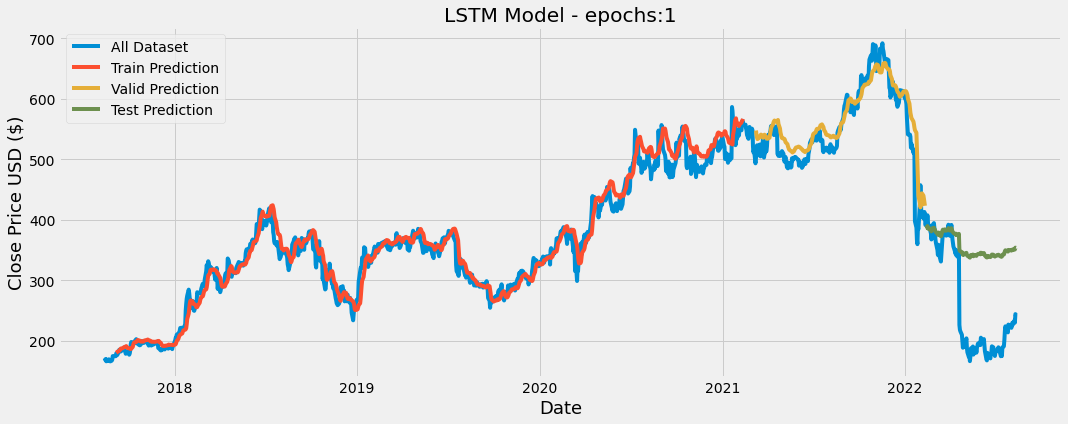

In [41]:
plt.figure(figsize=(16,6))

plt.title('LSTM Model - epochs:1')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

plt.plot(NFLX["Close"])
plt.plot(df_pred_train)
plt.plot(df_pred_valid)
plt.plot(df_pred_test)


plt.legend(['All Dataset', "Train Prediction",'Valid Prediction', "Test Prediction"], loc='upper left')
plt.show()

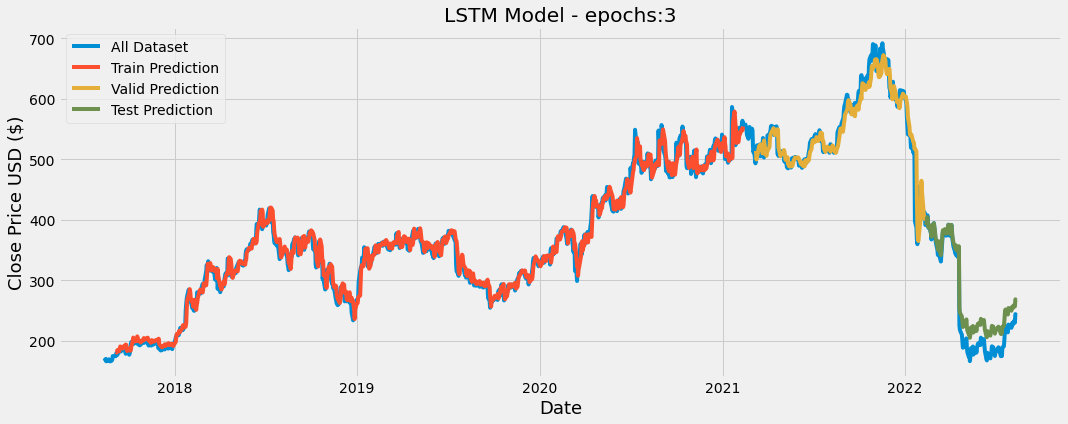

In [48]:
plt.figure(figsize=(16,6))

plt.title('LSTM Model - epochs:3')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

plt.plot(NFLX["Close"])
plt.plot(df_pred_train)
plt.plot(df_pred_valid)
plt.plot(df_pred_test)


plt.legend(['All Dataset', "Train Prediction",'Valid Prediction', "Test Prediction"], loc='upper left')
plt.show()

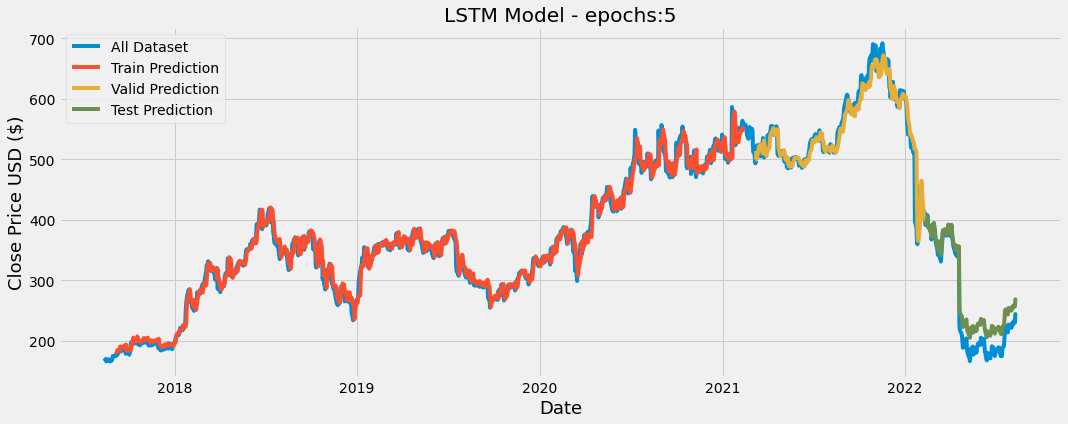

In [54]:
plt.figure(figsize=(16,6))

plt.title('LSTM Model - epochs:5')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

plt.plot(NFLX["Close"])
plt.plot(df_pred_train)
plt.plot(df_pred_valid)
plt.plot(df_pred_test)


plt.legend(['All Dataset', "Train Prediction",'Valid Prediction', "Test Prediction"], loc='upper left')
plt.show()

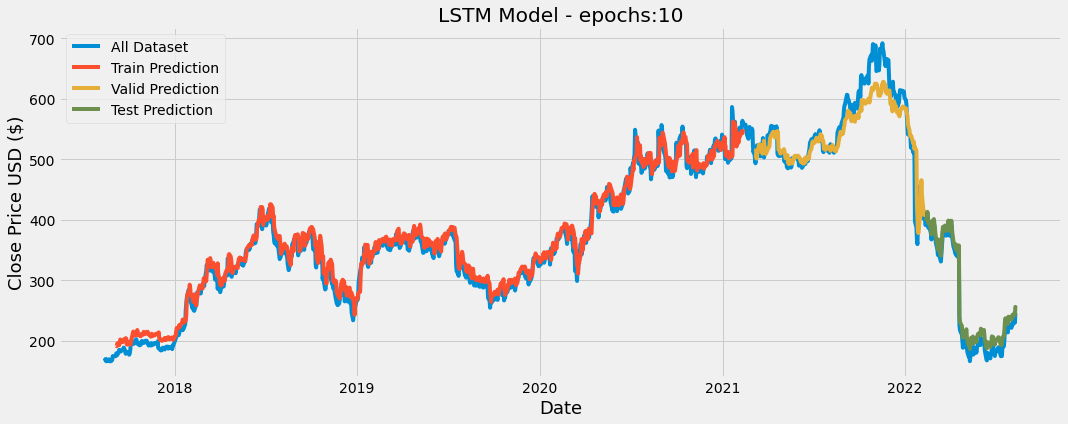

In [60]:
plt.figure(figsize=(16,6))

plt.title('LSTM Model - epochs:10')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

plt.plot(NFLX["Close"])
plt.plot(df_pred_train)
plt.plot(df_pred_valid)
plt.plot(df_pred_test)


plt.legend(['All Dataset', "Train Prediction",'Valid Prediction', "Test Prediction"], loc='upper left')
plt.show()

----------------

### Close Price Prediction using plotly epochs:10 

In [61]:

date_buttons = [
{'count': 28, 'label': "4WTD", 'step': "day", 'stepmode': "todate"},
{'count': 6, 'label': "6MTD", 'step': "month", 'stepmode': "todate"},
{'count': 1, 'label': "YTD", 'step': "year", 'stepmode': "todate"}]

fig = go.Figure()

fig.add_trace(go.Scatter(x=NFLX.index, y=NFLX["Close"], mode='lines',name='Raw Data',line = dict(color='royalblue', width=2, dash='dot')))

fig.add_trace(go.Scatter(x=df_pred_train.index, y=df_pred_train["Close"], mode='lines', name='Train_pred'))

fig.add_trace(go.Scatter(x=df_pred_valid.index, y=df_pred_valid["Close"], mode='lines',name='Valid_pred'))

fig.add_trace(go.Scatter(x=df_pred_test.index, y=df_pred_test["Close"], mode='lines',name='Test_pred'))


fig.update_layout(title="Stock Close Price Prediction - Epochs:10",
                   xaxis_title="Date",
                   yaxis_title="Stock Close Price $")

fig.update_layout( {"xaxis":
                            {"rangeselector":
                                 {"buttons": date_buttons} } } )

fig.update_layout(autosize=False, width=1400, height=600)

fig.show()



-------------------------
-------------------------
---------------------------

##  B - predict Close Prices for 3 mounths
### problem : predict 2022-05-01 to 2022-08-01 (3 months)
* create proper train, valid samples regarding to asking
* Target : "Close"
* Feature variable: ["Volume", "Open", "High", "Low", "Adj Close"] 
* Split into X, y - Train, Valid and Test 
* LSTM
* prediction train and valid
* calculation RMSE
* prediction Test
* Visulaization

In [62]:
# from begin to end of 2021-04-30 is train dataset

train = NFLX.loc[:"2021-04"]

In [63]:
# the problem is asking us to predict May to end of July 2022, so I create the same month range in 2021

valid = NFLX.loc["2021-05":"2021-07"]

In [64]:
# features columns

cols = ["Volume", "Open", "High", "Low", "Adj Close"]

In [65]:
# X_train, Y_train

Y_train = train['Close']
X_train = train[cols]

In [66]:
# X_val, Y_vald

Y_val = valid['Close']
X_val = valid[cols]

In [67]:
# X_test

X_test_ = NFLX.loc["2022-05":"2022-07"]
X_test = X_test_[cols]

In [68]:
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)

In [69]:
Y_train.shape, X_train.shape, Y_val.shape, X_val.shape

((935,), (935, 5), (63,), (63, 5))

In [70]:
# convert X datasets 2ndim to 3ndim

X_train_reshape = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

X_val_reshape = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

X_test_reshape = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [71]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape = (X_train_reshape.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_reshape, Y_train, batch_size=1, epochs=10, verbose=2)

Epoch 1/10
935/935 - 9s - loss: 28109.6562
Epoch 2/10
935/935 - 5s - loss: 679.1403
Epoch 3/10
935/935 - 5s - loss: 172.4379
Epoch 4/10
935/935 - 5s - loss: 133.0753
Epoch 5/10
935/935 - 5s - loss: 98.3117
Epoch 6/10
935/935 - 6s - loss: 126.6719
Epoch 7/10
935/935 - 6s - loss: 147.9341
Epoch 8/10
935/935 - 5s - loss: 96.6809
Epoch 9/10
935/935 - 6s - loss: 53.1375
Epoch 10/10
935/935 - 6s - loss: 91.8109


In [73]:
Y_train_pred = model.predict(X_train_reshape)

Y_val_pred = model.predict(X_val_reshape)

In [74]:
Y_train_rmse = mean_squared_error(Y_train, Y_train_pred, squared=False)
print(' Train Score: %.2f RMSE' % (Y_train_rmse))
    
print("***********")

Y_val_rmse = mean_squared_error(Y_val, Y_val_pred, squared=False)
print(' Val Score: %.2f RMSE' % (Y_val_rmse))

 Train Score: 7.96 RMSE
***********
 Val Score: 13.01 RMSE


In [75]:
Y_test_pred = model.predict(X_test_reshape)

In [76]:
df_pred_train = pd.DataFrame(Y_train_pred, columns = ["Close"]).set_index(train.index)
df_pred_valid = pd.DataFrame(Y_val_pred, columns = ["Close"]).set_index(valid.index)
df_pred_test = pd.DataFrame(Y_test_pred, columns = ["Close"]).set_index(X_test_.index)

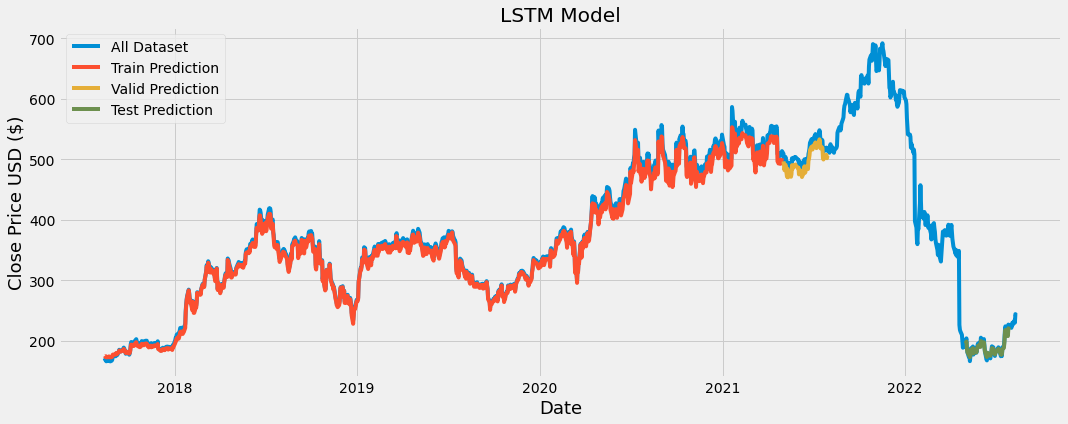

In [77]:
plt.figure(figsize=(16,6))

plt.title('LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

plt.plot(NFLX["Close"])
plt.plot(df_pred_train)
plt.plot(df_pred_valid)
plt.plot(df_pred_test)


plt.legend(['All Dataset', "Train Prediction",'Valid Prediction', "Test Prediction"], loc='upper left')
plt.show()

### Result shows that the prediction is very well, but prediction did not work well in the end of the train and valid 

------------------------

### problem : predict 2021-09-01 to 2021-12-01 (3 months)
* create proper train, valid samples regarding to asking
* Target : "Close"
* Feature variable: ["Volume", "Open", "High", "Low", "Adj Close"] 
* Split into X, y - Train, Valid and Test 
* LSTM
* prediction train and valid
* calculation RMSE
* prediction Test
* Visulaization

In [78]:
# from begin to end of 2021-04-30 is train dataset

train = NFLX.loc[:"2020-08"]

In [79]:
# the problem is asking us to predict May to end of July 2022, so I create the same month range in 2021

valid = NFLX.loc["2020-09":"2020-11"]

In [80]:
# features columns

cols = ["Volume", "Open", "High", "Low", "Adj Close"]

In [81]:
# X_train, Y_train

Y_train = train['Close']
X_train = train[cols]

In [82]:
# X_val, Y_vald

Y_val = valid['Close']
X_val = valid[cols]

In [83]:
# X_test

X_test_ = NFLX.loc["2021-09":"2021-11"]
X_test = X_test_[cols]

In [84]:
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)

In [85]:
Y_train.shape, X_train.shape, Y_val.shape, X_val.shape

((768,), (768, 5), (63,), (63, 5))

In [86]:
# convert X datasets 2ndim to 3ndim

X_train_reshape = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

X_val_reshape = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

X_test_reshape = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [87]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape = (X_train_reshape.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_reshape, Y_train, batch_size=1, epochs=10, verbose=2)

Epoch 1/10
768/768 - 8s - loss: 23446.9629
Epoch 2/10
768/768 - 5s - loss: 1411.1221
Epoch 3/10
768/768 - 5s - loss: 252.3775
Epoch 4/10
768/768 - 5s - loss: 87.5406
Epoch 5/10
768/768 - 5s - loss: 75.8274
Epoch 6/10
768/768 - 5s - loss: 61.0981
Epoch 7/10
768/768 - 5s - loss: 66.6495
Epoch 8/10
768/768 - 5s - loss: 68.6284
Epoch 9/10
768/768 - 5s - loss: 85.1581
Epoch 10/10
768/768 - 5s - loss: 41.1992


In [88]:
Y_train_pred = model.predict(X_train_reshape)

Y_val_pred = model.predict(X_val_reshape)

In [89]:
Y_train_rmse = mean_squared_error(Y_train, Y_train_pred, squared=False)
print(' Train Score: %.2f RMSE' % (Y_train_rmse))
    
print("***********")

Y_val_rmse = mean_squared_error(Y_val, Y_val_pred, squared=False)
print(' Val Score: %.2f RMSE' % (Y_val_rmse))

 Train Score: 4.83 RMSE
***********
 Val Score: 13.09 RMSE


In [90]:
Y_test_pred = model.predict(X_test_reshape)

In [91]:
df_pred_train = pd.DataFrame(Y_train_pred, columns = ["Close"]).set_index(train.index)
df_pred_valid = pd.DataFrame(Y_val_pred, columns = ["Close"]).set_index(valid.index)
df_pred_test = pd.DataFrame(Y_test_pred, columns = ["Close"]).set_index(X_test_.index)

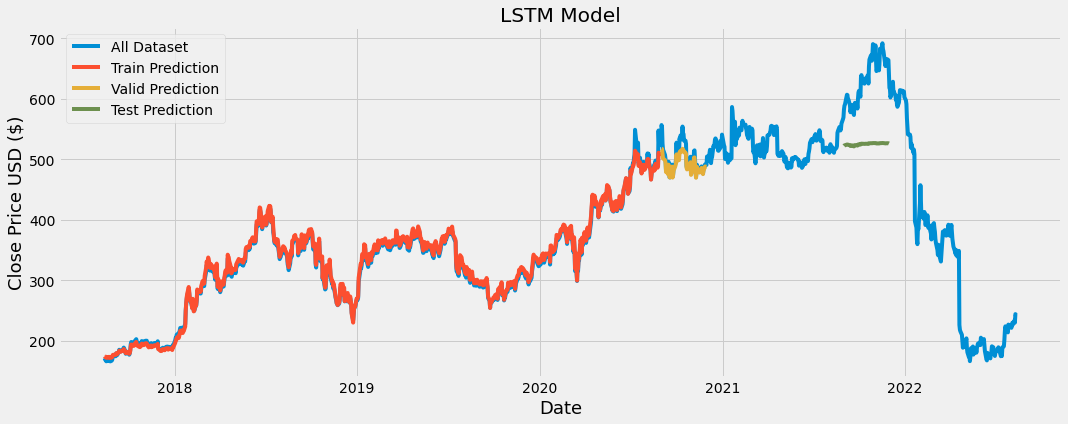

In [92]:
plt.figure(figsize=(16,6))

plt.title('LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

plt.plot(NFLX["Close"])
plt.plot(df_pred_train)
plt.plot(df_pred_valid)
plt.plot(df_pred_test)


plt.legend(['All Dataset', "Train Prediction",'Valid Prediction', "Test Prediction"], loc='upper left')
plt.show()

### The result shows that unexpected ascendings or descendings in future can not predicted well 

--------------

### References
* https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
* https://www.kaggle.com/code/hakansaritas/time-series-analysis-using-lstm-keras
* https://www.kaggle.com/code/hakansaritas/stock-market-analysis-prediction-using-lstm
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html
* https://www.educative.io/answers/how-to-use-the-pctchange-function-on-a-dataframe-in-pandas